# Module 5 Pyramid Practice in Python with `plotnine`

In this notebook, you'll see the `plotnine` equivalents of the pyramid practice. 

In [1]:
from plotnine import *
from plotnine.data import diamonds
import pandas as pd
import numpy as np

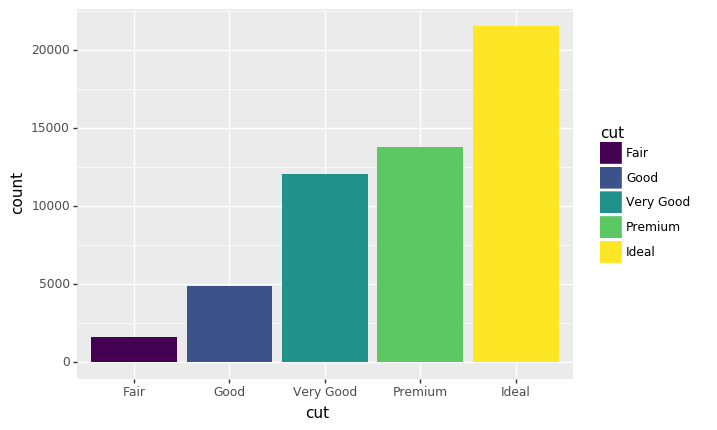

<ggplot: (-9223363275550308920)>

In [2]:
ggplot(data=diamonds) + geom_bar(aes(x="cut", fill="cut"))

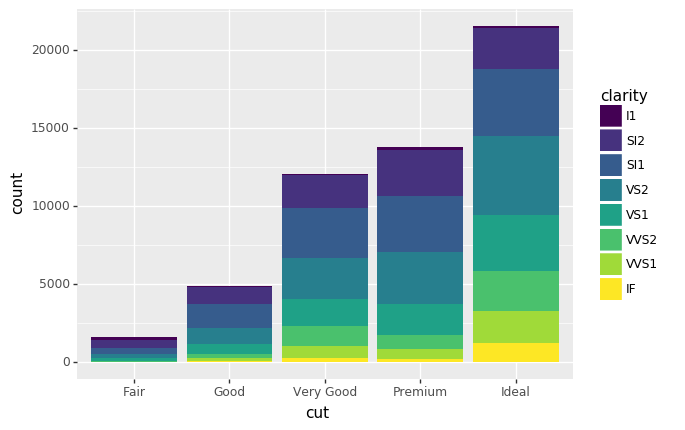

<ggplot: (8761304473734)>

In [3]:
ggplot(diamonds) + geom_bar(aes(x="cut", fill="clarity"))

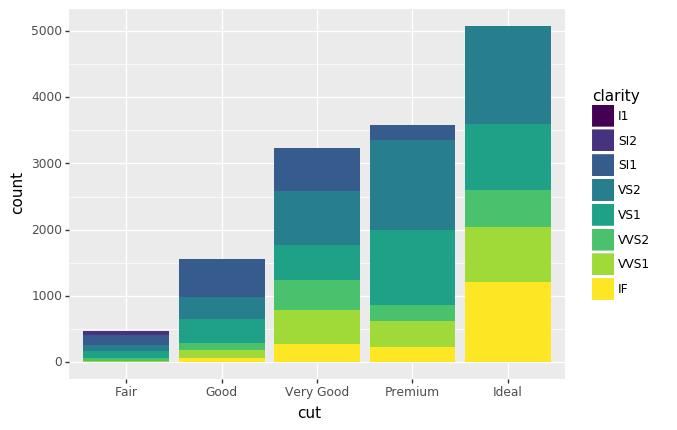

<ggplot: (-9223363275556646105)>

In [4]:
ggplot(diamonds) + geom_bar(aes(x="cut", fill="clarity"), position="identity")

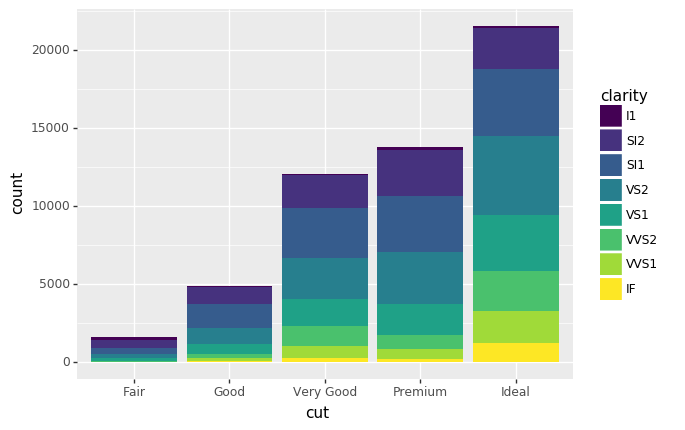

<ggplot: (-9223363275561855295)>

In [5]:
ggplot(diamonds) + geom_bar(aes(x="cut", fill="clarity"), position="stack")

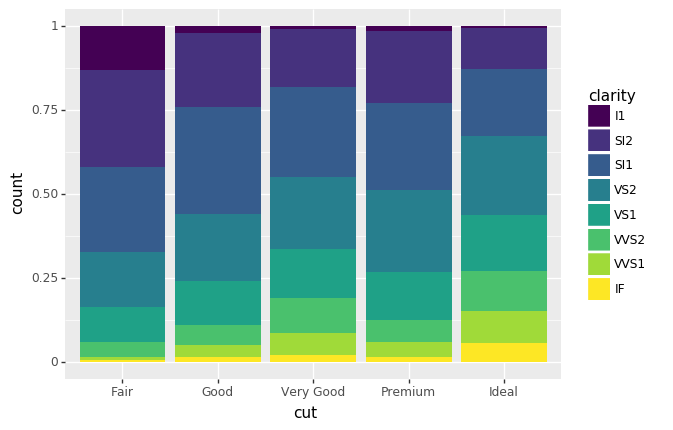

<ggplot: (8761292890102)>

In [6]:
ggplot(diamonds) + geom_bar(aes(x="cut", fill="clarity"), position="fill")

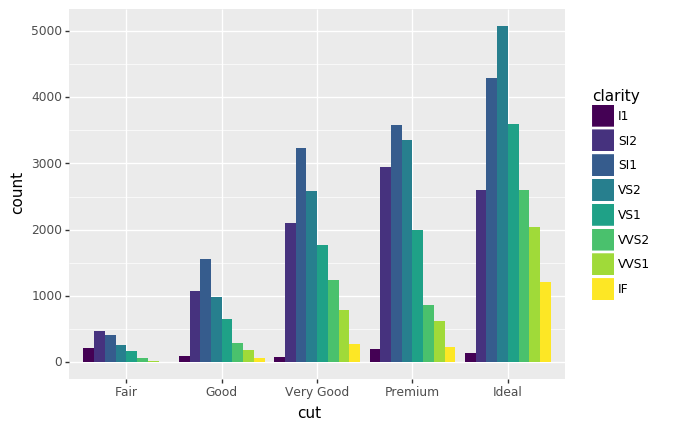

<ggplot: (8761292916719)>

In [7]:
ggplot(diamonds) + geom_bar(aes(x="cut", fill="clarity"), position="dodge")

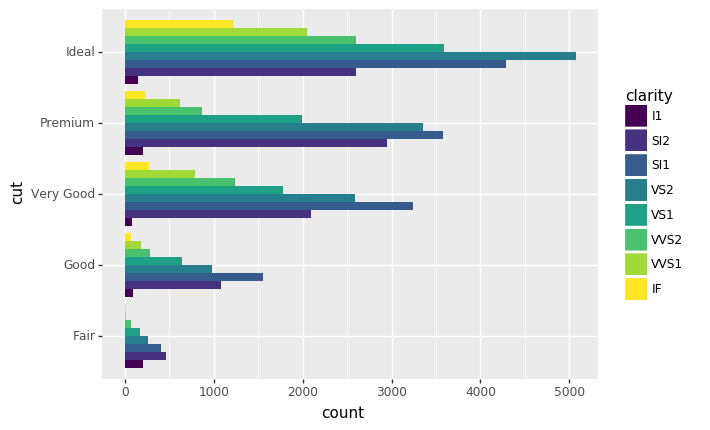

<ggplot: (8761286130913)>

In [8]:
ggplot(diamonds) + geom_bar(aes(x="cut", fill="clarity"), position="dodge") + coord_flip()

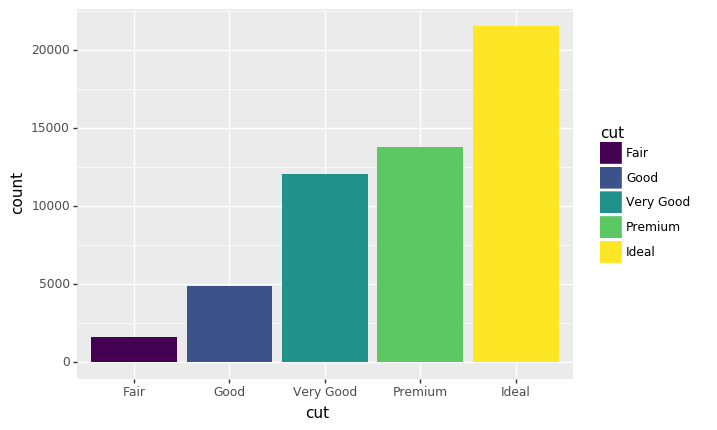

<ggplot: (-9223363275568695450)>

In [9]:
ggplot(diamonds) + geom_bar(aes(x="cut", fill="cut"), position="dodge")

**Unfortunately, `coord_polar` is not implemented in `plotnine`, so we can't draw a pie chart like in ggplot2 in R, but we can use matplotlib or plotly to create pie charts.** 


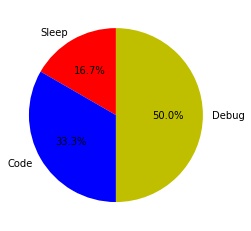

In [10]:
# Here is a simple example:

import matplotlib.pyplot as plt
 
hours = [4, 8, 12]
activities = ['Sleep', 'Code', 'Debug']
colors = ['r', 'b', 'y']
 
plt.pie(hours, labels=activities, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [11]:
# And in plotly:

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

colors = ['#FF0000', '#0000FF', '#FFFF00']

trace = go.Pie(labels=activities, values=hours, marker=dict(colors=colors))

data = [trace]
iplot(data)

**Now that we know how to manipulate position and coordinates, let's create a population pyramid.**


In [12]:
census = pd.read_csv("/dsa/data/all_datasets/census/census2010pyr.csv")
census.head()

,sex,age,pop
0,Male,0,2014276
1,Male,1,2030853
2,Male,2,2092198
3,Male,3,2104550
4,Male,4,2077550


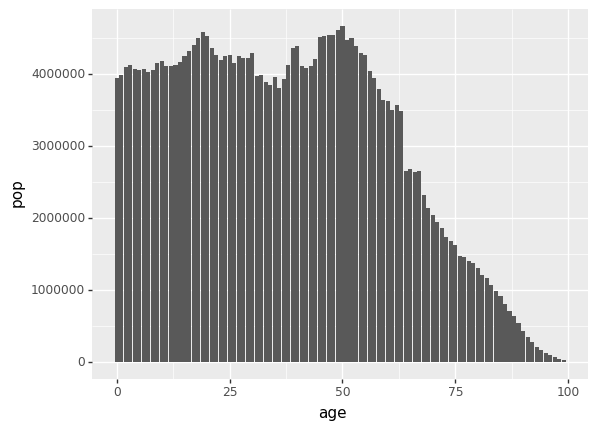

<ggplot: (8761193023380)>

In [13]:
ggplot(census, aes(x="age", y="pop")) + geom_bar(stat="identity")

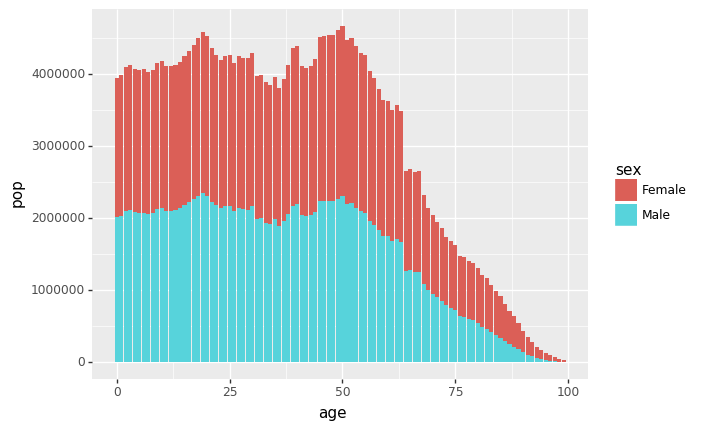

<ggplot: (-9223363275661775742)>

In [14]:
ggplot(census, aes(x="age", y="pop", fill="sex")) + geom_bar(stat="identity")

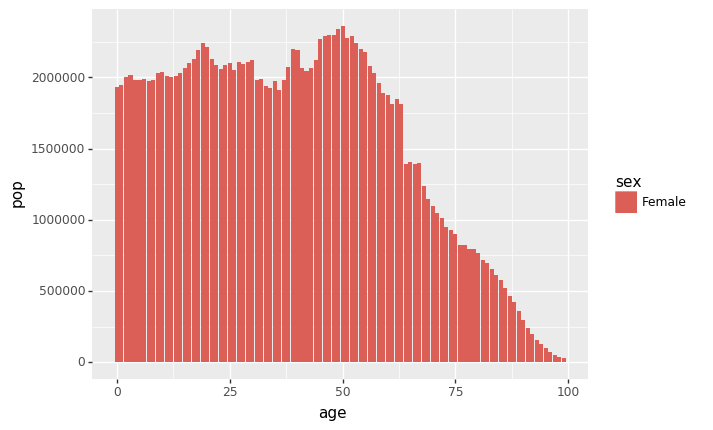

<ggplot: (8761292900079)>

In [15]:
ggplot(census, aes(x="age", y="pop", fill="sex")) + geom_bar(data = census[census["sex"]=="Female"], stat="identity")

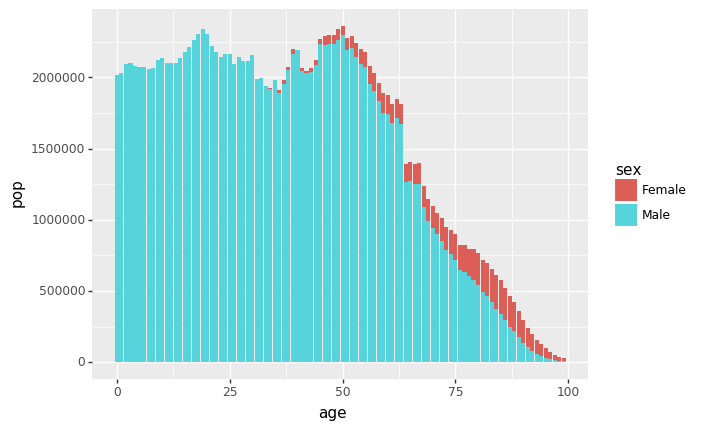

<ggplot: (-9223363275661863364)>

In [16]:
p = ggplot(census, aes(x="age", y="pop", fill="sex")) + geom_bar(data = census[census["sex"]=="Female"], stat="identity")
p = p+ geom_bar(data = census[census["sex"]=="Male"], stat="identity")
p

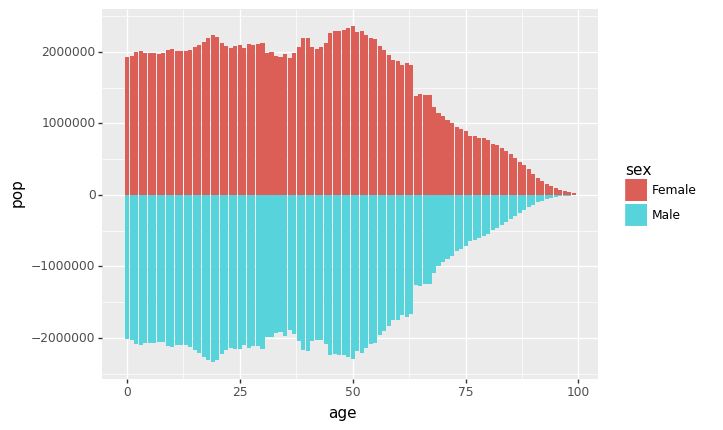

<ggplot: (8761192983977)>

In [17]:
p = ggplot(census, aes(x="age", y="pop", fill="sex")) + geom_bar(data = census[census["sex"]=="Female"], stat="identity")
p = p+ geom_bar(data = census[census["sex"]=="Male"], stat="identity",mapping= aes(y="-pop"))
p

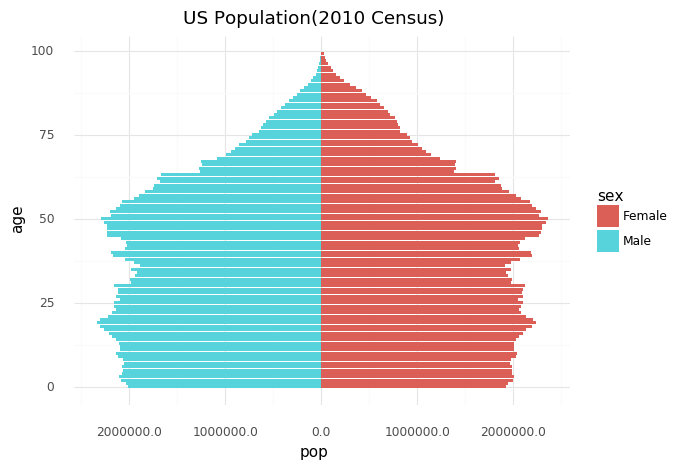

<ggplot: (-9223363275661997045)>

In [18]:
p = ggplot(census, aes(x="age", y="pop", fill="sex")) + geom_bar(data = census[census["sex"]=="Female"], stat="identity")
p = p+ geom_bar(data = census[census["sex"]=="Male"], stat="identity",mapping= aes(y="-pop"))
p + coord_flip() + theme_minimal() + scale_y_continuous(labels=abs) + ggtitle("US Population(2010 Census)")

In [19]:
co = pd.read_csv("/dsa/data/all_datasets/census/countries.csv")

**We need to rename the "Life expectancy" column to a name that complies with the rules of variable naming so that 
 we can do arithmetic like this in `aes(y="-lifeExp")`**

In [20]:
co.rename(columns={'Life expectancy':'lifeExp'}, inplace=True)
co.head()

,Country (en),Country (de),Country (local),Country code,Continent,Capital,Population,Area,Coastline,Government form,Currency,Currency code,Dialing prefix,Birthrate,Deathrate,lifeExp,Url
0,Afghanistan,Afghanistan,Afganistan/Afqanestan,AF,Asia,NaN,33332025,652230,0,Presidential islamic republic,Afghani,AFN,93,38.3,13.7,51.3,https://www.laenderdaten.info/Asien/Afghanista...
1,Egypt,Ägypten,Misr,EG,Africa,NaN,94666993,1001450,2450,Presidential republic,Pfund,EGP,20,30.3,4.7,72.7,https://www.laenderdaten.info/Afrika/Aegypten/...
2,Åland Islands,Ålandinseln,Åland,AX,Europe,NaN,29013,1580,0,Autonomous region of Finland,Euro,EUR,358,0.0,0.0,0.0,https://www.laenderdaten.info/Europa/Aland/ind...
3,Albania,Albanien,Shqipëria,AL,Europe,NaN,3038594,28748,362,parliamentary republic,Lek,ALL,355,13.1,6.7,78.3,https://www.laenderdaten.info/Europa/Albanien/...
4,Algeria,Algerien,Al-Jaza’ir/Algérie,DZ,Africa,NaN,40263711,2381741,998,Presidential republic,Dinar,DZD,213,23.0,4.3,76.8,https://www.laenderdaten.info/Afrika/Algerien/...


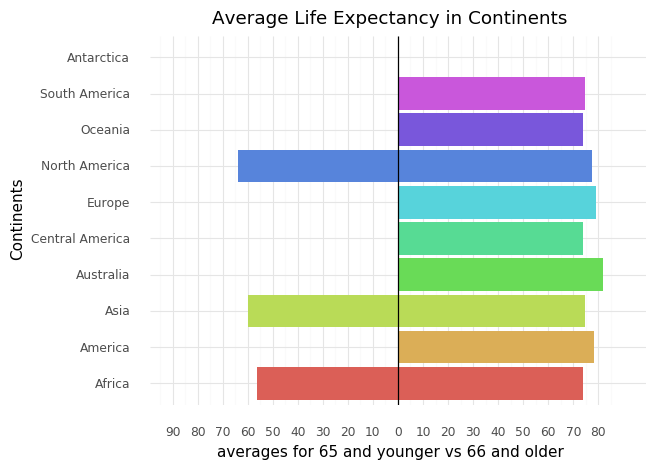

<ggplot: (8761194161465)>

In [21]:
p = ggplot(data=co, mapping=aes(x="Continent", y="lifeExp", fill="Continent"))
p = p + geom_bar(co[co["lifeExp"]>65], stat="summary", fun_y=np.mean)
p = p + geom_bar(data=co[co["lifeExp"]<=65], stat="summary", fun_y=np.mean, mapping=aes(y="-lifeExp"))
p = p + geom_abline(slope=0) + scale_y_continuous(labels=abs, limits = [-90, 90], breaks = list(range(-90, 90, 10)))
p = p + coord_flip() + ylab("averages for 65 and younger vs 66 and older") + xlab("Continents")
p = p + theme_minimal() + ggtitle("Average Life Expectancy in Continents") + theme(legend_position="none")
p